In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(144, 1)
            Penumpang
Month                
1949-01-01        112
1949-02-01        118
1949-03-01        132
1949-04-01        129
1949-05-01        121


<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

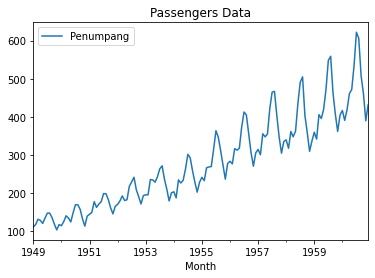

In [16]:
airline = pd.read_csv('Pesawat.csv',index_col='Month', parse_dates=True, sep = ";")
# finding shape of the dataframe
print(airline.shape)
# having a look at the data
print(airline.head())
# plotting the original data
airline[['Penumpang']].plot(title='Passengers Data')

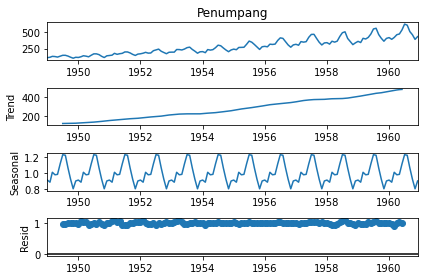

In [18]:
decompose_result = seasonal_decompose(airline['Penumpang'],model='multiplicative')
decompose_result.plot();

In [10]:
# Set the frequency of the date time index as Monthly start as indicated by the data
airline.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

C:\Users\hangg\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


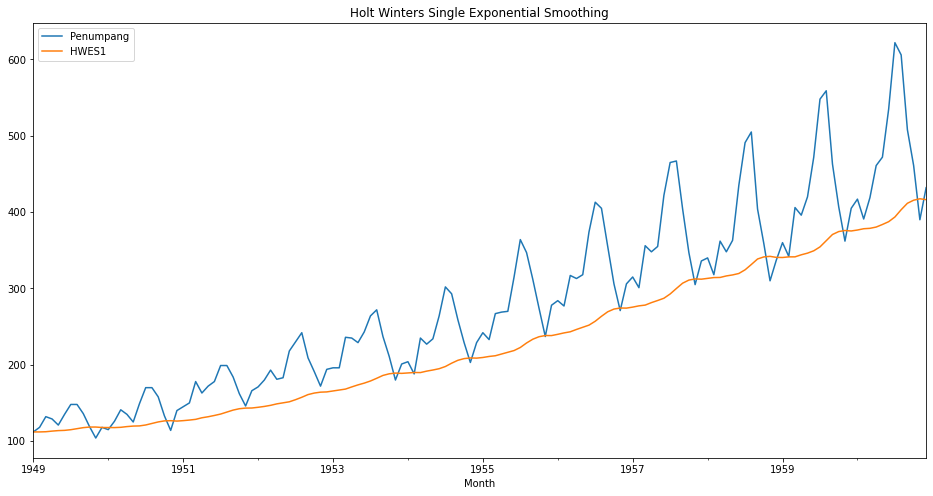

In [15]:
airline['HWES1'] = SimpleExpSmoothing(airline['Penumpang']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[['Penumpang','HWES1']].plot(title='Holt Winters Single Exponential Smoothing', figsize=(16,8));

C:\Users\hangg\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


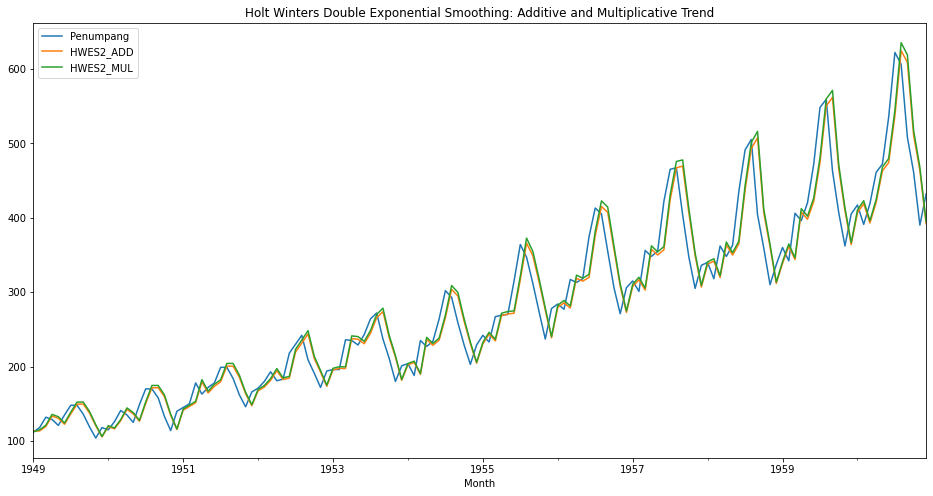

In [13]:
airline['HWES2_ADD'] = ExponentialSmoothing(airline['Penumpang'],trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Penumpang'],trend='mul').fit().fittedvalues
airline[['Penumpang','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', figsize = (16,8));

C:\Users\hangg\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hangg\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


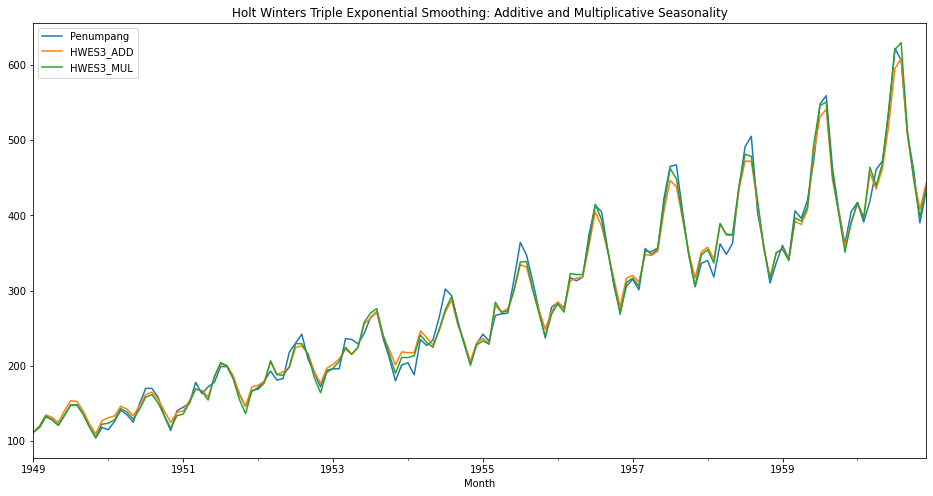

In [18]:
airline['HWES3_ADD'] = ExponentialSmoothing(airline['Penumpang'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['HWES3_MUL'] = ExponentialSmoothing(airline['Penumpang'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline[['Penumpang','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', figsize = (16,8));

In [19]:
f_airline = pd.read_csv('Pesawat.csv',index_col='Month', parse_dates=True, sep = ';')

In [60]:
print(f_airline.index.freq)

<MonthBegin>


In [20]:
f_airline.index.freq='MS'

In [25]:
f_airline.tail()

,Penumpang
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [21]:
f_airline.shape

(144, 1)

In [22]:
train_airline = f_airline[:120]
test_airline = f_airline[120:]

C:\Users\hangg\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hangg\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

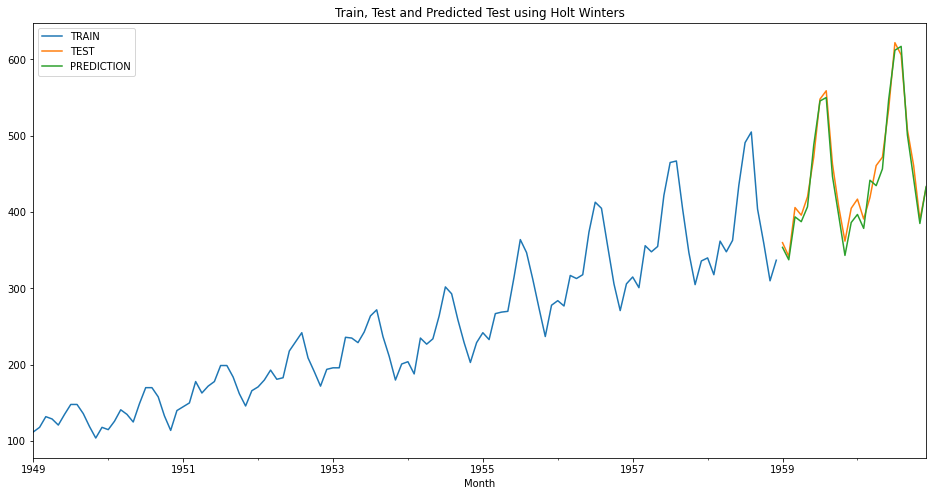

In [24]:
fitted_model = ExponentialSmoothing(train_airline['Penumpang'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline['Penumpang'].plot(legend=True,label='TRAIN')
test_airline['Penumpang'].plot(legend=True,label='TEST',figsize=(16,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

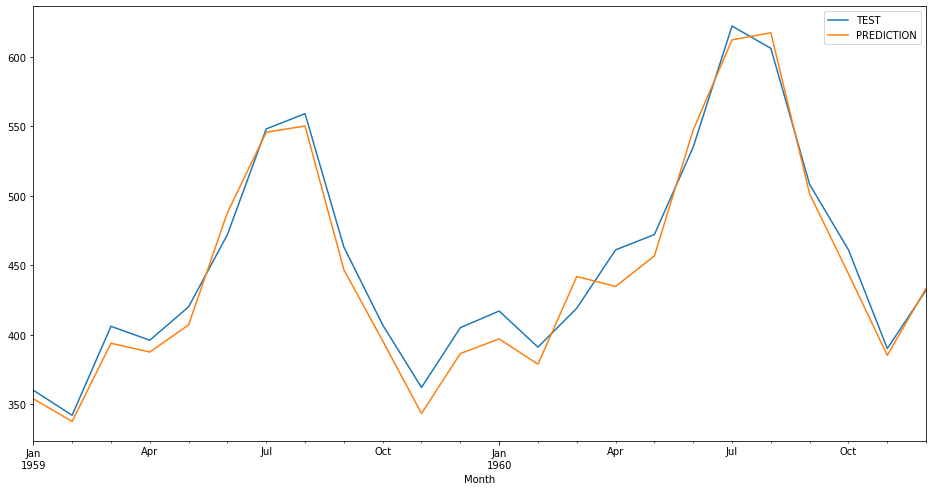

In [29]:
test_airline['Penumpang'].plot(legend=True,label='TEST',figsize=(16,8))
test_predictions.plot(legend=True,label='PREDICTION');

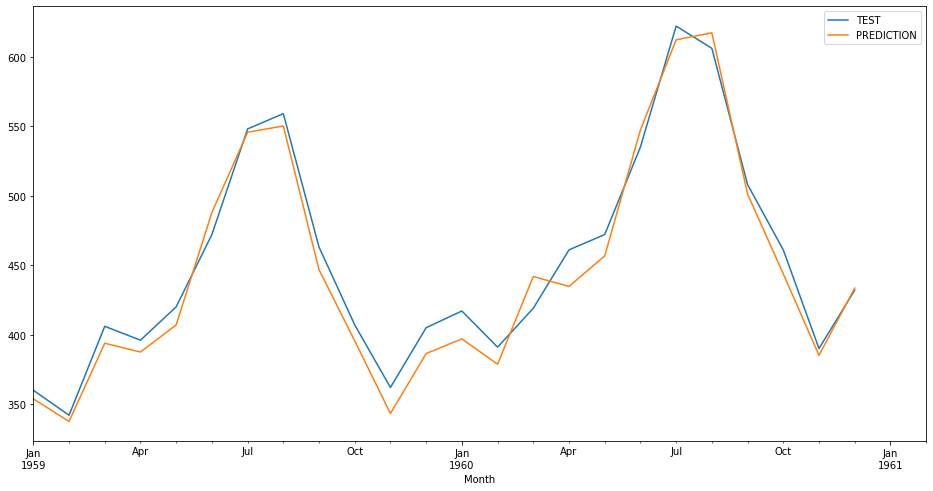

In [30]:
test_airline['Penumpang'].plot(legend=True,label='TEST',figsize=(16,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1959-01-01','1961-02-01']);

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_airline,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_airline,test_predictions)}')

Mean Absolute Error = 12.380562118162578
Mean Squared Error = 192.61081010030716


In [53]:
test_airline['Penumpang']

Month
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Penumpang, dtype: int64

In [57]:
from datetime import datetime

In [63]:
prediksi = fitted_model.predict(start=datetime(1960,12,2), end = datetime(1961,12,1))

In [64]:
print(prediksi)

1961-01-01    445.318029
1961-02-01    424.863012
1961-03-01    495.662511
1961-04-01    487.695663
1961-05-01    512.286329
1961-06-01    613.998033
1961-07-01    686.730667
1961-08-01    692.417169
1961-09-01    562.280613
1961-10-01    497.807898
1961-11-01    432.080264
1961-12-01    486.309672
Freq: MS, dtype: float64


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

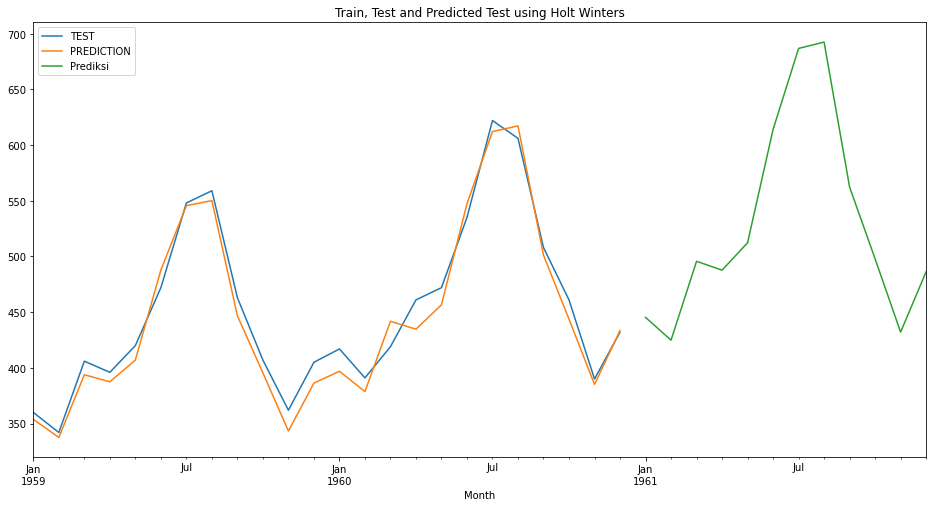

In [65]:
test_airline['Penumpang'].plot(legend=True,label='TEST',figsize=(16,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1959-01-01','1961-02-01']);
prediksi.plot(legend=True, label='Prediksi')
plt.title('Train, Test and Predicted Test using Holt Winters')